## Q1. Use logistic regression to build a model to classify the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

**Defining Logistic Regression Model**

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, number_of_iterations=30000):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        
    def train(self, X, y):
        self.m, self.n = X.shape
        
        self.weights = np.zeros(self.n)
        self.bias = 0
        
        for _ in range(self.number_of_iterations):
            # calculating the hypothesis
            y_hat = 1 / (1 + np.exp(-(X.dot(self.weights) + self.bias)))
            
            # calculating derivatives
            dw = (1 / self.m) * np.dot(X.T, (y_hat - y))
            db = (1 / self.m) * np.sum(y_hat - y)
            
            # updating weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        y_pred = 1 / (1 + np.exp(-(X.dot(self.weights) + self.bias)))
        
        return y_pred

**Loading the dataset**

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [4]:
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

**Splitting the dataset into training and testing data.**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Feature Scaling**

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Implementing the model for class Setosa i.e. 'Class Label 0'**

In [7]:
first_model = LogisticRegression()

# changing the class label for 'Setosa' from '0' to '1' and others to '0'
setosa_y_train = np.where(y_train == 0, 1, 0)

first_model.train(X_train, setosa_y_train)

# calculating the probability for the sample being labelled as 'Setosa'
setosa_pred = first_model.predict(X_test)

**Implementing the model for class Versicolor i.e. 'Class Label 1'**

In [8]:
second_model = LogisticRegression()

# changing the class label for others than 'Versicolor' to '0'
versi_y_train = np.where(y_train == 1, 1, 0)

second_model.train(X_train, versi_y_train)

# calculating the probability for the sample being labelled as 'Versicolor'
versi_pred = second_model.predict(X_test)

**Implementing the model for class Verginica i.e. 'Class Label 2'**

In [9]:
third_model = LogisticRegression()

# changing the class label for 'Setosa' from '0' to '1' and others to '0'
vergi_y_train = np.where(y_train == 2, 1, 0)

third_model.train(X_train, vergi_y_train)

# calculating the probability for the sample being labelled as 'Vergini'
vergi_pred = third_model.predict(X_test)

**Probabilities for test sample being a class label.**

In [10]:
probabilities = pd.DataFrame({0: setosa_pred, 1: versi_pred, 2: vergi_pred})

In [11]:
probabilities.head()

0         1         2
0  4.089308e-06  0.858713  0.010016
1  1.707793e-08  0.795825  0.998681
2  8.845346e-08  0.141727  0.999938
3  4.534907e-08  0.347248  0.999889
4  1.619277e-06  0.765813  0.363611

**Predicting the probabilities by finding the maximum.**

In [12]:
probabilities['pred'] = probabilities.idxmax(axis=1)

In [13]:
y_pred = probabilities['pred']

**Confusion Matrix**

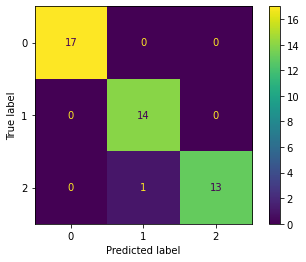

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot()
plt.show()

**Accuracy**

In [15]:
def accuracy(test, pred):
    count = 0
    
    for i in range(len(test)):
        if test[i] == pred[i]:
            count += 1
            
    return count / len(test)

In [16]:
print(f'Accuracy: {accuracy(np.array(y_test), np.array(y_pred))}')

Accuracy: 0.9777777777777777
